In [277]:
import pandas as pd
from datapackage import Package
import matplotlib.pyplot as plt
import numpy as np
from iso3166 import countries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Country Code to Country Mapping

In [26]:
package = Package('https://datahub.io/core/country-list/datapackage.json')

# print list of all resources:
#print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        content = resource.read()
ISO_Alpha2_Country_Mapping = {item[1]:item[0] for item in content}
ISO_Alpha2_Country_Mapping['KR']='Korea' #From 'Korea, Republic of' to Korea

# How Language affects Trending

In [27]:
DF = pd.read_pickle("../Data/Cleaned_Data(No_Agg).pkl")

In [28]:
DF['Lang'].fillna('Unknown', inplace=True)

In [29]:
DF['Lang'].replace({'English (United Kingdom)':'English', 'Spanish (Latin America)':'Spanish', 'Spanish (Spain)':'Spanish'}, inplace=True)


### Which Language Trended the most in which countries?

In [30]:
Country_Vs_Lang_Table = DF.groupby(['viewing_country', 'Lang'])['video_id'].count().unstack()
Country_Vs_Lang_Table = Country_Vs_Lang_Table.fillna(value=0).astype('int64')

In [31]:
def toppers(x, how_many=3):
    toppers = {key:x.to_dict()[key] for key in sorted(x.to_dict(), key=lambda y: x.to_dict()[y], reverse=True)[:how_many]}
    toppers.update({'Other':x.sum() - sum(toppers.values())})
    return toppers

Outer = Country_Vs_Lang_Table.sum(axis=1)

Inner = Country_Vs_Lang_Table.apply(lambda x:toppers(x,2), axis=1)   

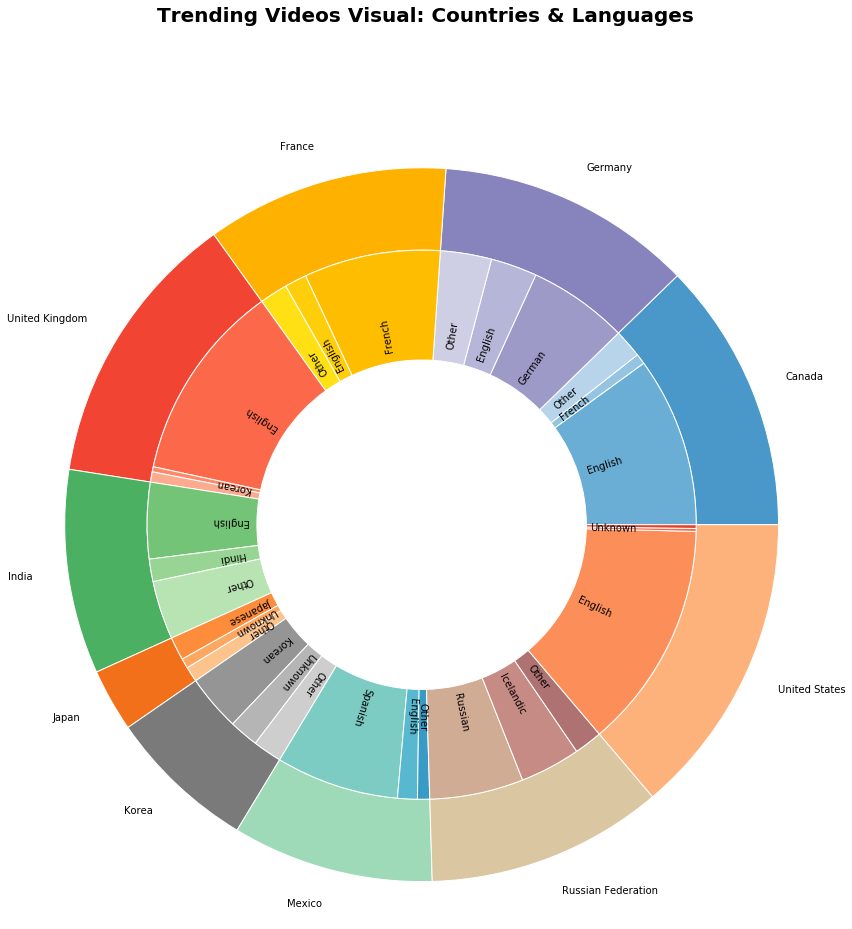

In [34]:
fig, axis = plt.subplots(figsize = (12,12))
_=axis.axis('equal')
color_range = [plt.cm.Blues, plt.cm.Purples, plt.cm.Wistia, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges , plt.cm.Greys, plt.cm.GnBu_r, plt.cm.pink, plt.cm.OrRd_r]
colors = [color(0.6) for color in color_range]

#Outer pie
labels = [ISO_Alpha2_Country_Mapping[cc] for cc in Outer.index]
pie1= axis.pie(Outer, labels=labels, colors=colors,radius=1.3)  
_=plt.setp(pie1[0], width=0.3, edgecolor='white' )

#Inner pie
names = list(np.array([list(item) for item in Inner.map(lambda x: x.keys()).to_list()]).flatten())
values = list(np.array([list(item) for item in Inner.map(lambda x: x.values()).to_list()]).flatten())
colors = []
for color in color_range:
    colors = colors + [color(i) for i in [0.5,0.4,0.3]]
pie2 = axis.pie(values, radius=1.3-0.3, labels=names, labeldistance=0.7, colors=colors)
_=plt.setp(pie2[0], width=0.4, edgecolor='white')
_=plt.margins(0,0)

# do the rotation of the labels
for w, t in zip(pie2[0], pie2[1]):
    mang =(w.theta1 + w.theta2)/2.  # get mean_angle of the wedge
    #print(mang, t.get_rotation())
    _=t.set_rotation(mang)         # rotate the label by (mean_angle + 270)
    _=t.set_va("center")
    _=t.set_ha("center")
    _=t.set
#Tiding up the clutter
_=pie2[1][11].set_visible(False)
_=pie2[1][-1].set_visible(False)
_=axis.axis('equal')

_=plt.suptitle('Trending Videos Visual: Countries & Languages', fontsize=20, weight='bold', y=1.1)

_=plt.tight_layout()
_= plt.savefig('../Image/Lang1.png', bbox_inches = "tight" )
_=plt.show()


**As we would expect, The local language seems to play a big role in trending**

# Is there any difference in popularity for trending (longevity) across countries ?

In [42]:
DF = pd.read_pickle('../Data/Popularity_DF.pkl')

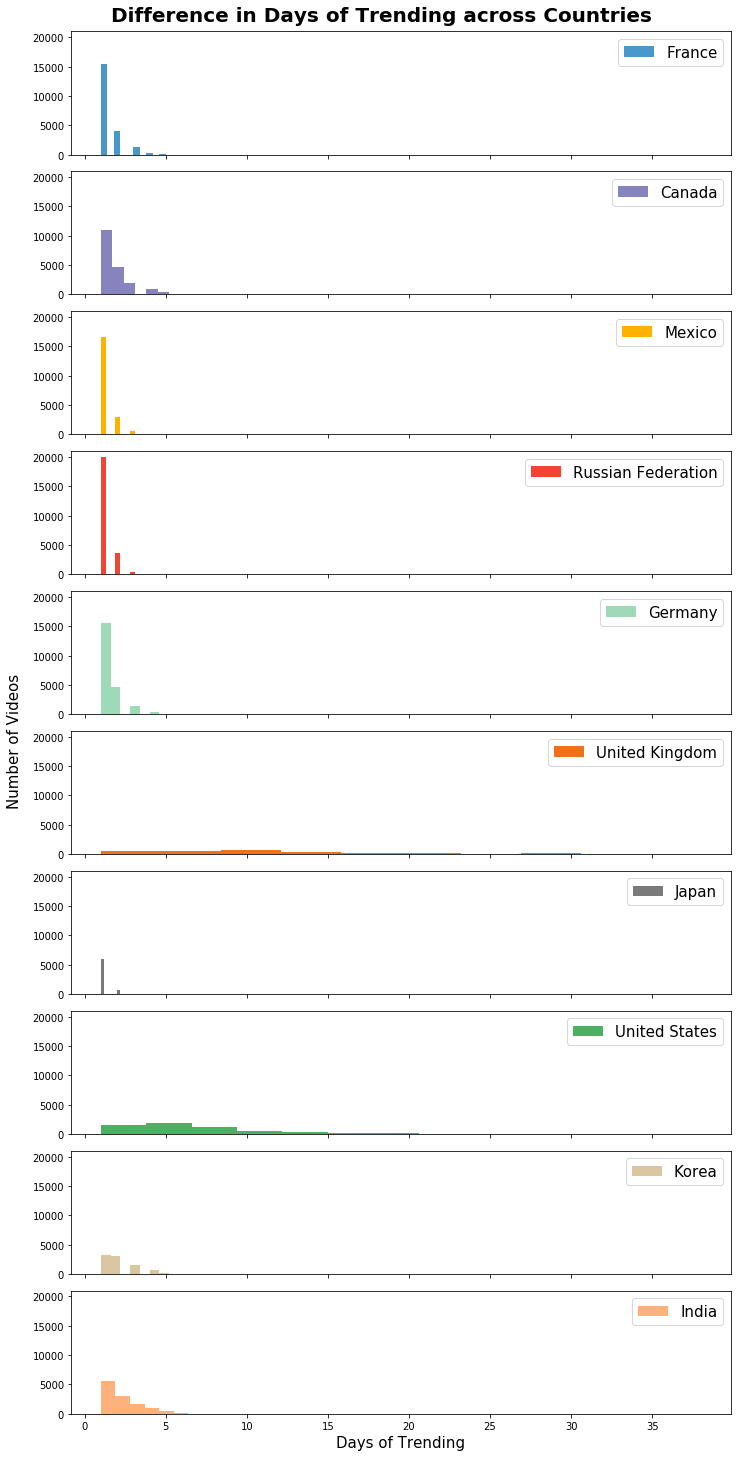

In [88]:
List_of_CCs = DF['viewing_country'].unique()

fig, axs = plt.subplots(10, 1, sharex=True, sharey=True, tight_layout=True, figsize=(10,20))

color_range = [plt.cm.Blues, plt.cm.Purples, plt.cm.Wistia, plt.cm.Reds, plt.cm.GnBu_r, plt.cm.Oranges , plt.cm.Greys, plt.cm.Greens , plt.cm.pink, plt.cm.OrRd_r]
colors = [color(0.6) for color in color_range]

for index,cc in enumerate(List_of_CCs):
    _=axs[index].hist(DF[DF['viewing_country']==cc]['Total_Trend_Days'], color=colors[index], alpha=1, label=ISO_Alpha2_Country_Mapping[cc])

    #legend
    _=axs[index].legend(loc='upper right', fontsize = 15)
    

    
_=plt.suptitle('Difference in Days of Trending across Countries', fontsize=20, weight='bold', y=1.01) 
#xlabel, ylabel
_=plt.xlabel('Days of Trending',fontsize = 15)
_=fig.text(-0.02, 0.5, 'Number of Videos', va='center', rotation='vertical', fontsize = 15)


_ = plt.tight_layout()
_= plt.savefig('../Image/Popularity_Across_Countries.png', bbox_inches = "tight" )
plt.show()

# Is there any difference in popularity for trending (longevity) across countries ?

In [99]:
DF = pd.read_pickle('../Data/Popularity_DF.pkl')

In [100]:
DF['Language'].fillna('Unknown', inplace=True)
DF['Language'].replace({'English (United Kingdom)':'English', 'Spanish (Latin America)':'Spanish', 'Spanish (Spain)':'Spanish'}, inplace=True)


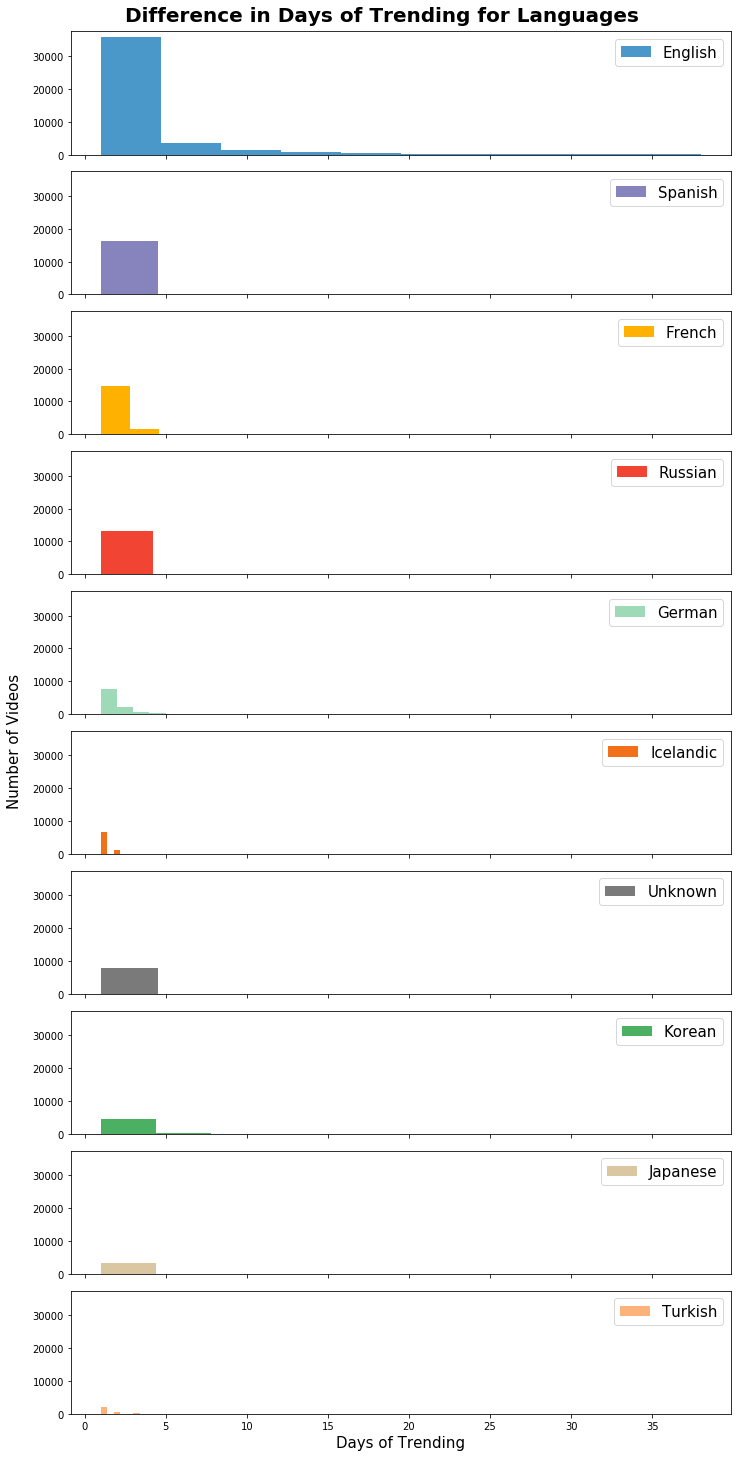

In [102]:
Top10 = DF['Language'].value_counts().index[:10]

fig, axs = plt.subplots(10, 1, sharex=True, sharey=True, tight_layout=True, figsize=(10,20))

color_range = [plt.cm.Blues, plt.cm.Purples, plt.cm.Wistia, plt.cm.Reds, plt.cm.GnBu_r, plt.cm.Oranges , plt.cm.Greys, plt.cm.Greens , plt.cm.pink, plt.cm.OrRd_r]
colors = [color(0.6) for color in color_range]

for index,lang in enumerate(Top10):
    _=axs[index].hist(DF[DF['Language']==lang]['Total_Trend_Days'], color=colors[index], alpha=1, label=lang)

    #legend
    _=axs[index].legend(loc='upper right', fontsize = 15)
    

    
_=plt.suptitle('Difference in Days of Trending for Languages', fontsize=20, weight='bold', y=1.01) 
#xlabel, ylabel
_=plt.xlabel('Days of Trending',fontsize = 15)
_=fig.text(-0.02, 0.5, 'Number of Videos', va='center', rotation='vertical', fontsize = 15)


_ = plt.tight_layout()
_= plt.savefig('../Image/Popularity_for_Languages.png', bbox_inches = "tight" )
plt.show()

# How similar countries are in terms of their taste in trending videos ?

In [211]:
DF = pd.read_pickle('../Data/Popularity_DF.pkl')

In [212]:
Country_Video_Table = DF.groupby('viewing_country').aggregate(Video_List = ('video_id', lambda x: x.to_list()))


In [213]:
Country_Video_Table.index = [ISO_Alpha2_Country_Mapping[cc] for cc in Country_Video_Table.index]
Country_Video_Table

,Video_List
Canada,"[--45ws7CEN0, --7vNbh4UNA, --YgtVuvWGo, --wOJ2..."
Germany,"[--7vNbh4UNA, --I0aj8MUdU, --moh3hSPpY, --rE6D..."
France,"[--2K8l6BWfw, --728h8mnDY, --8-sr76Haw, --DqT_..."
United Kingdom,"[--uXQQ0h-yQ, -3VBPAZPTQI, -43MBOJnVks, -5WBCr..."
India,"[-0WuM6ctLHg, -0mcgX4ro7I, -0qWaHPYLRc, -0rIUy..."
Japan,"[-09XygZcXEU, -0Gd9DBh3W4, -0q2P8spwng, -1Uptv..."
Korea,"[-0SxwCD7Uc4, -0YMxuZ8ezo, -0exy3EqrvQ, -0i1pb..."
Mexico,"[--45ws7CEN0, -0EPhTUesFo, -0XyhJkpXjM, -0vcE2..."
Russian Federation,"[--45ws7CEN0, --9LvCHDHYQ, -07PqRbugOM, -0Zl7W..."
United States,"[-0CMnp02rNY, -0NYY8cqdiQ, -1Hm41N0dUs, -1yT-K..."


In [214]:
def Cosine_Similarity_Matrix(Table):
    N = Table.index.to_list()
    Sim_Matrix = pd.DataFrame(index=N, columns=N)
    for row in N:
        for col in N:
            Num = len(set(Table.loc[row][0]).intersection(set(Table.loc[col][0])))
            Denom = np.sqrt(len(Table.loc[row][0])*len(Table.loc[col][0]))
            Sim_Matrix.loc[row,col] = Num/Denom
    Sim_Matrix = Sim_Matrix.astype('float') 
    return Sim_Matrix

,Canada,Germany,France,United Kingdom,India,Japan,Korea,Mexico,Russian Federation,United States
Canada,1.000000,0.206175,0.161927,0.113342,0.082421,0.036209,0.034402,0.064335,0.022374,0.195455
Germany,0.206175,1.000000,0.140922,0.059018,0.043016,0.026018,0.020276,0.054633,0.069039,0.088373
France,0.161927,0.140922,1.000000,0.049524,0.048191,0.024726,0.018591,0.047829,0.033955,0.051685
United Kingdom,0.113342,0.059018,0.049524,1.000000,0.015346,0.019136,0.026448,0.047534,0.020298,0.225973
India,0.082421,0.043016,0.048191,0.015346,1.000000,0.013804,0.007833,0.020530,0.006267,0.025361
Japan,0.036209,0.026018,0.024726,0.019136,0.013804,1.000000,0.043578,0.019242,0.009711,0.019795
Korea,0.034402,0.020276,0.018591,0.026448,0.007833,0.043578,1.000000,0.014603,0.008298,0.019608
Mexico,0.064335,0.054633,0.047829,0.047534,0.020530,0.019242,0.014603,1.000000,0.015194,0.047924
Russian Federation,0.022374,0.069039,0.033955,0.020298,0.006267,0.009711,0.008298,0.015194,1.000000,0.015232
United States,0.195455,0.088373,0.051685,0.225973,0.025361,0.019795,0.019608,0.047924,0.015232,1.000000


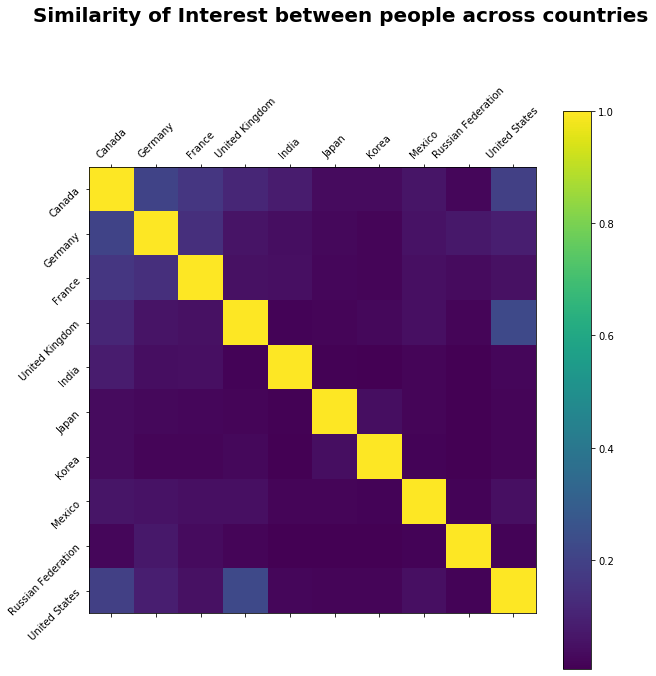

In [312]:
Similarity = Cosine_Similarity_Matrix(Country_Video_Table)
Similarity

_=plt.figure(figsize=(10,10))
_=plt.matshow(Similarity, fignum=1)
_=plt.xticks(range(len(Similarity.columns)), Similarity.columns, rotation=45)
_=plt.yticks(range(len(Similarity.columns)), Similarity.columns, rotation=45)
_=plt.colorbar()
_=plt.suptitle('Similarity of Interest between people across countries', fontsize=20, weight='bold', y=1.01) 
_= plt.savefig('../Image/Correlation_on_video_watch.png')
_=plt.show()

In [382]:
Sorted_Similarity = Similarity.stack().sort_values(ascending=False)

In [383]:
Morethan10perc = Sorted_Similarity[Sorted_Similarity!=1][Sorted_Similarity[Sorted_Similarity!=1]>=0.1].reset_index()

In [384]:
Morethan10perc.reset_index(inplace=True)
Morethan10perc.columns = ['index', 'countries', 'relationship', 'similarity']

In [385]:
Morethan10perc['relationship'] = Morethan10perc.apply(lambda x: "Relationship: {}".format(x['index']//2 + 1), axis=1)

In [386]:
Country_ISO_Dict = {val:key for key,val in ISO_Alpha2_Country_Mapping.items()}
Morethan10perc['iso_code'] = Morethan10perc['countries'].map(Country_ISO_Dict)
Morethan10perc['iso_code_alpha3'] = Morethan10perc['iso_code'].map(lambda x: [item for item in countries.get(x)][2])
Country_RelationShip_Dict = Morethan10perc.groupby('countries').aggregate(relationships =  ('relationship', lambda x: '\n'.join(x.to_list()))).to_dict()['relationships']   
Morethan10perc['relationships'] = Morethan10perc['countries'].map(lambda x: "{}: {}".format(x, Country_RelationShip_Dict[x]))


In [412]:
import plotly.express as px

fig = px.line_geo(Morethan10perc, hover_name= 'relationships',locations="iso_code_alpha3",
                  color="relationship",
                  projection="equirectangular")
fig.show()

#'equirectangular', 'orthographic'

# What categories are liked in which coutries? Is there a similarity?

In [437]:
DF = pd.read_pickle("../Data/Cleaned_Data(No_Agg).pkl")

In [438]:
Country_Vs_Cat_Table = DF.groupby(['viewing_country', 'category'])['video_id'].count().unstack()
Country_Vs_Cat_Table = Country_Vs_Cat_Table.fillna(value=0).astype('int64')

In [439]:
def toppers(x, how_many=3):
    toppers = {key:x.to_dict()[key] for key in sorted(x.to_dict(), key=lambda y: x.to_dict()[y], reverse=True)[:how_many]}
    toppers.update({'Other':x.sum() - sum(toppers.values())})
    return toppers

Outer = Country_Vs_Cat_Table.sum(axis=1)

Inner = Country_Vs_Cat_Table.apply(lambda x:toppers(x,4), axis=1)   

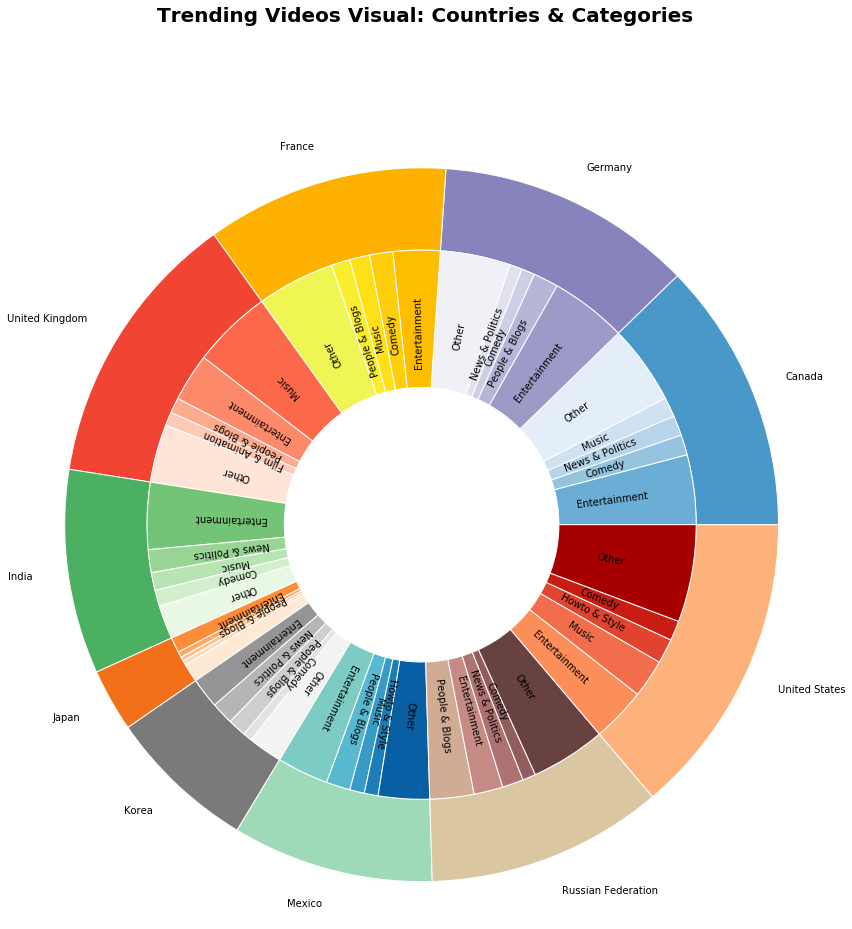

In [457]:
fig, axis = plt.subplots(figsize = (12,12))
_=axis.axis('equal')
color_range = [plt.cm.Blues, plt.cm.Purples, plt.cm.Wistia, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges , plt.cm.Greys, plt.cm.GnBu_r, plt.cm.pink, plt.cm.OrRd_r]
colors = [color(0.6) for color in color_range]

#Outer pie
labels = [ISO_Alpha2_Country_Mapping[cc] for cc in Outer.index]
pie1= axis.pie(Outer, labels=labels, colors=colors,radius=1.3)  
_=plt.setp(pie1[0], width=0.3, edgecolor='white' )

#Inner pie
names = list(np.array([list(item) for item in Inner.map(lambda x: x.keys()).to_list()]).flatten())
values = list(np.array([list(item) for item in Inner.map(lambda x: x.values()).to_list()]).flatten())
colors = []
for color in color_range:
    colors = colors + [color(i) for i in [0.5,0.4,0.3,0.2,0.1]]
pie2 = axis.pie(values, radius=1.3-0.3, labels=names, labeldistance=0.7, colors=colors)
_=plt.setp(pie2[0], width=0.5, edgecolor='white')
_=plt.margins(0,0)

# do the rotation of the labels
for w, t in zip(pie2[0], pie2[1]):
    mang =(w.theta1 + w.theta2)/2.  # get mean_angle of the wedge
    #print(mang, t.get_rotation())
    _=t.set_rotation(mang)         # rotate the label by (mean_angle + 270)
    _=t.set_va("center")
    _=t.set_ha("center")
    _=t.set
#Tiding up the clutter
_=pie2[1][27].set_visible(False)
_=pie2[1][28].set_visible(False)
_=pie2[1][29].set_visible(False)

_=axis.axis('equal')

_=plt.suptitle('Trending Videos Visual: Countries & Categories', fontsize=20, weight='bold', y=1.1)

_=plt.tight_layout()
_= plt.savefig('../Image/Cat1.png', bbox_inches = "tight" )
_=plt.show()